# Creating a basic ingest of a NetCDF file

In [1]:
### Sometimes a file might be in the netCDF file format but not conform to cfradial standards and can't
### be read with Py-ART. One way of working around this is to create a basic ingest, here is a hypothetically
### example, this file can be read with Py-ART, but lets act like it doesn't! :)

In [2]:
import netCDF4
import pyart
import numpy as np


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [3]:
# We will read the nc data with netCDF4.Dataset

In [4]:
data = netCDF4.Dataset("test_radar.nc")

In [5]:
# Lets get an idea of the shapes for rays and gates and the keys in this dataset.

In [6]:
data.variables.keys()

dict_keys(['time', 'range', 'azimuth', 'elevation', 'corrected_reflectivity_horizontal', 'reflectivity_horizontal', 'recalculated_diff_phase', 'specific_attenuation', 'unf_dp_phase_shift', 'mean_doppler_velocity', 'diff_phase', 'rain_rate_A', 'norm_coherent_power', 'dp_phase_shift', 'diff_reflectivity', 'proc_dp_phase_shift', 'copol_coeff', 'sweep_number', 'fixed_angle', 'sweep_start_ray_index', 'sweep_end_ray_index', 'sweep_mode', 'latitude', 'longitude', 'altitude', 'time_coverage_start', 'time_coverage_end', 'time_reference', 'volume_number', 'platform_type', 'instrument_type', 'primary_axis'])

In [7]:
data["azimuth"][:].shape

(400,)

In [8]:
data["range"][:].shape

(667,)

In [9]:
# Make a empty radar with the dimensions of the dataset.

In [10]:
radar = pyart.testing.make_empty_ppi_radar(667, 400, 1)

In [11]:
# Start filling the radar attributes with variables in the dataset.

In [12]:
radar.time["data"] = np.array(data["time"][:])

In [13]:
data["longitude"][:]

masked_array(data=-97.59416667,
             mask=False,
       fill_value=1e+20)

In [14]:
radar.latitude["data"] = np.array([data["latitude"][:]])

In [15]:
radar.longitude["data"] = np.array([data["longitude"][:]])

In [16]:
radar.longitude["data"]

array([-97.59416667])

In [17]:
radar.range["data"] = np.array(data["range"][:])

In [18]:
# Sometimes the dataset might just contain gate spacing, but if the gate spacing is uniform,
# there is a way around it, we see a gate spacing of 60 above.

In [19]:
radar.range["data"] = np.linspace(0.0, 60.0 * (667 - 1), 667)

In [20]:
# As you can see below we obtained the same range data. This isn't needed
# if the range data is present, but using gate spacing and ngates is another way around it.

In [21]:
radar.range["data"]

array([    0.,    60.,   120.,   180.,   240.,   300.,   360.,   420.,
         480.,   540.,   600.,   660.,   720.,   780.,   840.,   900.,
         960.,  1020.,  1080.,  1140.,  1200.,  1260.,  1320.,  1380.,
        1440.,  1500.,  1560.,  1620.,  1680.,  1740.,  1800.,  1860.,
        1920.,  1980.,  2040.,  2100.,  2160.,  2220.,  2280.,  2340.,
        2400.,  2460.,  2520.,  2580.,  2640.,  2700.,  2760.,  2820.,
        2880.,  2940.,  3000.,  3060.,  3120.,  3180.,  3240.,  3300.,
        3360.,  3420.,  3480.,  3540.,  3600.,  3660.,  3720.,  3780.,
        3840.,  3900.,  3960.,  4020.,  4080.,  4140.,  4200.,  4260.,
        4320.,  4380.,  4440.,  4500.,  4560.,  4620.,  4680.,  4740.,
        4800.,  4860.,  4920.,  4980.,  5040.,  5100.,  5160.,  5220.,
        5280.,  5340.,  5400.,  5460.,  5520.,  5580.,  5640.,  5700.,
        5760.,  5820.,  5880.,  5940.,  6000.,  6060.,  6120.,  6180.,
        6240.,  6300.,  6360.,  6420.,  6480.,  6540.,  6600.,  6660.,
      

In [22]:
radar.fixed_angle["data"] = np.array(data["fixed_angle"])

In [23]:
radar.sweep_number["data"] = np.array(data["sweep_number"])

In [24]:
radar.sweep_start_ray_index["data"] = np.array(data["sweep_start_ray_index"])

In [25]:
radar.sweep_end_ray_index["data"] = np.array(data["sweep_end_ray_index"])

In [26]:
radar.altitude["data"] = np.array(data["altitude"])

In [27]:
radar.azimuth["data"] = np.array(data["azimuth"])

In [28]:
radar.sweep_mode["data"] = np.array(data["sweep_mode"])

In [29]:
data["fixed_angle"][:]

masked_array(data=[3.5],
             mask=False,
       fill_value=1e+20)

In [30]:
# If elevation doesn't exist, but fixed angle doesn't, you can do
# fixed angle multiplied by nrays

In [31]:
radar.elevation["data"] = np.array(
    [data["fixed_angle"][:]] * len(data["azimuth"][:])
).squeeze()

In [32]:
# With elevation and azimuth in the radar object, lets recalculate
# gate latitude, longitude and altitude,

In [33]:
radar.init_gate_altitude()
radar.init_gate_longitude_latitude()

In [34]:
radar.gate_longitude["data"]

array([[-97.59416667, -97.59416776, -97.59416886, ..., -97.59489769,
        -97.59489879, -97.5948999 ],
       [-97.59416667, -97.59415662, -97.59414657, ..., -97.5874659 ,
        -97.58745576, -97.58744563],
       [-97.59416667, -97.59414621, -97.59412575, ..., -97.5805231 ,
        -97.58050246, -97.58048182],
       ...,
       [-97.59416667, -97.59419881, -97.59423095, ..., -97.61560159,
        -97.61563401, -97.61566644],
       [-97.59416667, -97.59418877, -97.59421087, ..., -97.6089062 ,
        -97.6089285 , -97.60895079],
       [-97.59416667, -97.59417836, -97.59419005, ..., -97.60196382,
        -97.60197561, -97.60198741]])

In [35]:
# Let's work on the field data, we will just do reflectivity for now, but any of the
# other fields can be done the same way and added as a key pair in the fields dict.

In [36]:
from pyart.config import get_metadata

In [37]:
ref_dict = get_metadata("reflecitivity_horizontal")

In [38]:
ref_dict["data"] = np.array(data["reflectivity_horizontal"])

In [39]:
ref_dict["data"]

array([[ -6.21875  ,   1.34375  ,  -8.0078125, ...,  -1.2109375,
          1.1171875,   1.59375  ],
       [ -6.2109375,   1.421875 ,  -8.5625   , ...,   2.34375  ,
         -0.7109375,   0.609375 ],
       [ -6.2109375,  -0.5078125,  -9.3828125, ...,  -0.6875   ,
         -2.328125 ,  -0.3203125],
       ...,
       [ -6.21875  ,   2.       ,  -9.21875  , ...,   0.859375 ,
         -6.6484375,  -1.328125 ],
       [ -6.2109375,   1.8515625, -10.25     , ...,   0.9375   ,
         -1.75     ,  -0.0234375],
       [ -6.21875  ,   1.6328125,  -8.2890625, ...,  -2.546875 ,
         -1.578125 ,   0.6796875]], dtype=float32)

In [40]:
radar.fields = {"reflectivity_horizontal": ref_dict}

In [41]:
# Now what does that data look like plotted with Py-ART, also confirm if it works.

In [42]:
import matplotlib.pyplot as plt

In [43]:
display = pyart.graph.RadarMapDisplay(radar)

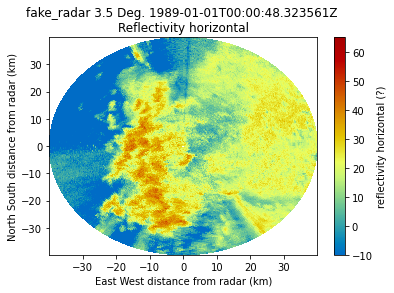

In [44]:
display.plot_ppi("reflectivity_horizontal")
plt.show()